# Visualization Tutorial Sample Solution


## Problem: 

How should we design our functions? Follow the *recipe* or just design *randomly*?

Well, obviously, follow the recipe. For completely unrelated fun, however, let's see how often those words have appeared in books in English since 1850. We'll use data from [Google's ngram project](http://storage.googleapis.com/books/ngrams/books/datasetsv2.html). We'll get counts of the number of occurrences of each word in a given year (or None if the word is missing for that year).

**Design a function that takes a list of word frequency data and graphs both the "recipe" and "randomly" frequencies (on the y axis) against the year.** Your function may assume that the data provided are in order by year. Be sure to give your graph a title, a legend, axes labels, and contrasting colours for the two plotted lines. Remember to follow the helper rules. Often you will find it *very* useful to design helper functions to extract the x values and y values for your graph. (In this case, there are two sets of y values and so perhaps two helper functions for those.)

**Where no data is available for a frequency in a year, just plot a 0.** (But you may also be curious to experiment with what it looks like to plot `None` instead.)

Remember also that each function you design should be tested, and any function that produces a graph will need more than just an `expect`. It will also need either a very clear description of what we should see in the graph or (better yet) a sketch showing what we should see so that we can check that the function produces what was expected when run.

Finish by calling your function on `FULL_LIST` (but note that `FULL_LIST` is too large to be a good test set for your function). 

In [1]:
from cs103 import *
from typing import NamedTuple, List, Optional

# Optional[int]
# interp. a number or None if the value is missing
OI_NONE = None
OI_7 = 7

# template based on optional
@typecheck
def fn_for_optional_int(oi: Optional[int]) -> ...:
    if oi is None:
        return ...
    else:
        return ...(oi)

WordFreq = NamedTuple('WordFreq', [('year', int),                 # in range[1000, ...)   
                                   ('recipe', Optional[int]),     # in range[0, ...) 
                                   ('randomly', Optional[int])])  # in range[0, ...)  
# interp. how often Google's book collection includes the words 
# recipe and randomly in a given year. (None indicates no data
# for that year.)
WF0 = WordFreq(1900, None, 0)
WF_HIGH_RECIPE = WordFreq(1901, 10, None)
WF_HIGH_RANDOMLY = WordFreq(1902, 1, 13)

# template based on compound and reference rule (twice, both Optional[int])
@typecheck
def fn_for_word_freq(wf: WordFreq) -> ...:
    return ...(wf.year,
               fn_for_optional_int(wf.recipe),
               fn_for_optional_int(wf.randomly))


# List[WordFreq]
# interp. a list of word frequencies
L0 = []
L1 = [WordFreq(1900, None, None),
      WordFreq(1901, 20, None),
      WordFreq(1902, 25, 7),
      WordFreq(1903, 21, 15),
      WordFreq(1904, 28, None),
      WordFreq(1905, 15, 10),
      WordFreq(1906, 30, 20)]

# template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_lowf(lowf: List[WordFreq]) -> ...:
    # description of the acc
    acc = ... # type: ...
    
    for wf in lowf:
        acc = ...(acc, fn_for_word_freq(wf))
    
    return ...(acc)

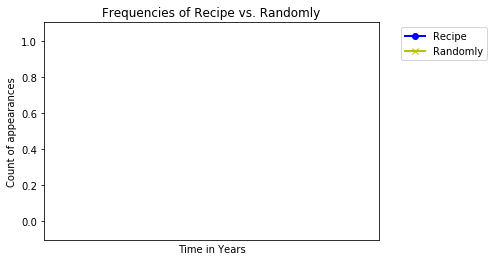

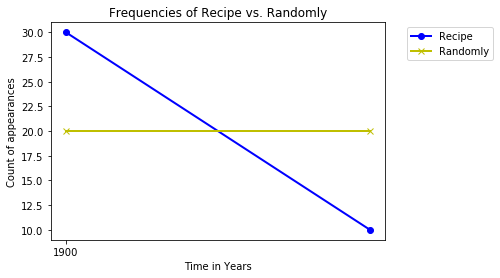

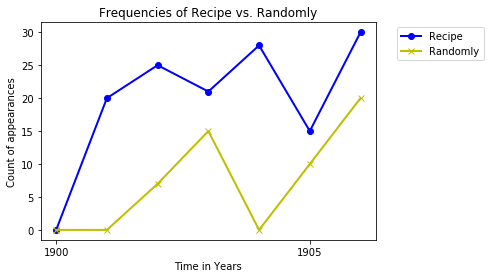

3 of 3 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed
4 of 4 tests passed


In [2]:
from matplotlib import pyplot
from cs103 import *
from typing import List

# It would be neat to make it so our chart's title accurately describes the years
# covered by the data. So, if lowf is empty, it could leave the years out; otherwise,
# it could find the min year and max year and say XXXX-YYYY for that min to max range.
@typecheck
def show_word_freq_chart(lowf: List[WordFreq]) -> None:
    """
    show the word frequencies via a line chart
    """
    # return None #stub
    
    years = get_years(lowf)
    recipe_freqs = get_recipe_freqs(lowf)
    randomly_freqs = get_randomly_freqs(lowf)
    
    pyplot.xlabel('Time in Years')
    pyplot.ylabel('Count of appearances')
    pyplot.title('Frequencies of Recipe vs. Randomly')
    recipe_line = pyplot.plot(years, recipe_freqs)
    randomly_line = pyplot.plot(years, randomly_freqs)
    pyplot.setp(recipe_line, color='b', linewidth=2.0, marker="o", label="Recipe")
    pyplot.setp(randomly_line, color='y', linewidth=2.0, marker="x", label="Randomly")
    pyplot.xticks(get_label_years(lowf))
    
    
    # we want to show the legend because this plot contains two lines. The arguments will place
    # the legend to the right of the plot
    pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2)
    
    pyplot.show()

    return

@typecheck
def get_label_years(lowf: List[WordFreq]) -> List[int]:
    """
    returns the list containing every fifth year for the x-label
    """
    #return [] #stub
    #template from List[WordFreq]

    # acc contains every fifth year from lowf seen so far
    acc = [] # type: List[int]
    
    # count contains the number of data we've seen so far
    count = 0 # type: int
    
    for wf in lowf:
        if count % 5 == 0:
            acc.append(wf.year)
        count = count + 1
    
    return acc

@typecheck
def get_years(lowf: List[WordFreq]) -> List[int]:
    """
    returns the list of years
    from lowf
    """
    #return [] #stub
    #template from List[WordFreq]
    
    # acc contains the years from lowf seen so far
    acc = [] # type: List[int]
    
    for wf in lowf:
        acc.append(wf.year)
    
    return acc

@typecheck
def get_recipe_freqs(lowf: List[WordFreq]) -> List[int]:
    """
    returns the list of "recipe" word frequencies from lowf,
    with 0 where the frequency was missing.
    """
    #return [] #stub
    #template from List[WordFreq]
    
    # acc contains the hare populations from lowf seen so far
    acc = [] # type: List[float]
    
    for wf in lowf:
        acc.append(get_zeroed_recipe_freq(wf))
    
    return acc

@typecheck
def get_randomly_freqs(lowf: List[WordFreq]) -> List[int]:
    """
    returns the list of "randomly" word frequencies from lowf,
    with 0 where the frequency was missing.
    """
    #return [] #stub
    #template from List[WordFreq]
    
    # acc contains the hare populations from lowf seen so far
    acc = [] # type: List[float]
    
    for wf in lowf:
        acc.append(get_zeroed_randomly_freq(wf))
    
    return acc

@typecheck
def get_zeroed_recipe_freq(wf: WordFreq) -> int:
    """
    return the frequency with which "recipe" occurs in wf,
    returning 0 where recipe is missing.
    """
    #return 0  #stub
    #template from WordFreq
    return zero_out_missing(wf.recipe)

@typecheck
def get_zeroed_randomly_freq(wf: WordFreq) -> int:
    """
    return the frequency with which "randomly" occurs in wf,
    returning 0 where recipe is missing.
    """
    #return 0  #stub
    #template from WordFreq
    return zero_out_missing(wf.randomly)

@typecheck
def zero_out_missing(oi: Optional[int]) -> int:
    """
    return the number, replacing missing values with 0
    """
    #return 0  #stub
    #template from Optional[int]
    
    if oi is None:
        return 0
    else:
        return oi
    
start_testing()

# Should produce an empty chart like the one labelled "TEST 1" in the cell below.
# Briefly: title is "Frequencies of Recipe vs. Randomly", x label is "Time in Years",
# y label is "Count of appearances", and there's a legend to show which line is for
# "recipe" and which for "randomly".
expect(show_word_freq_chart([]), None)

# Should produce a chart with a couple of points in each line like the one labelled
# "TEST 2" in the cell below. Briefly, like the above chart except with a blue line
# for "recipe" going from (1900, 30) to (1901, 10) whereas the yellow "randomly" line 
# is steady at 20 from 1900 to 1901.
expect(show_word_freq_chart([WordFreq(1900, 30, 20),
                             WordFreq(1901, 10, 20)]), None)

# See below for the sketch for this more complex test, labelled "TEST 3".
expect(show_word_freq_chart(L1), None)
summary()

start_testing()
expect(get_label_years([]), [])
expect(get_label_years(L1), [1900, 1905])
summary()

start_testing()
expect(get_years([]), [])
expect(get_years(L1), [1900, 1901, 1902, 1903, 1904, 1905, 1906])
summary()

start_testing()
expect(get_recipe_freqs([]), [])
expect(get_recipe_freqs(L1), [0, 20, 25, 21, 28, 15, 30])
summary()

start_testing()
expect(get_randomly_freqs([]), [])
expect(get_randomly_freqs(L1), [0, 0, 7, 15, 0, 10, 20])
summary()

start_testing()
expect(get_zeroed_recipe_freq(WordFreq(1900, None, 1)), 0)
expect(get_zeroed_recipe_freq(WordFreq(1900, 0, None)), 0)
expect(get_zeroed_recipe_freq(WordFreq(1900, 8, 3)), 8)
summary()

start_testing()
expect(get_zeroed_randomly_freq(WordFreq(1900, None, 1)), 1)
expect(get_zeroed_randomly_freq(WordFreq(1900, 0, None)), 0)
expect(get_zeroed_randomly_freq(WordFreq(1900, 8, 3)), 3)
summary()

start_testing()
expect(zero_out_missing(None), 0)
expect(zero_out_missing(0), 0)
expect(zero_out_missing(-2), -2)
expect(zero_out_missing(1), 1)
summary()

**TEST1**



**TEST2**

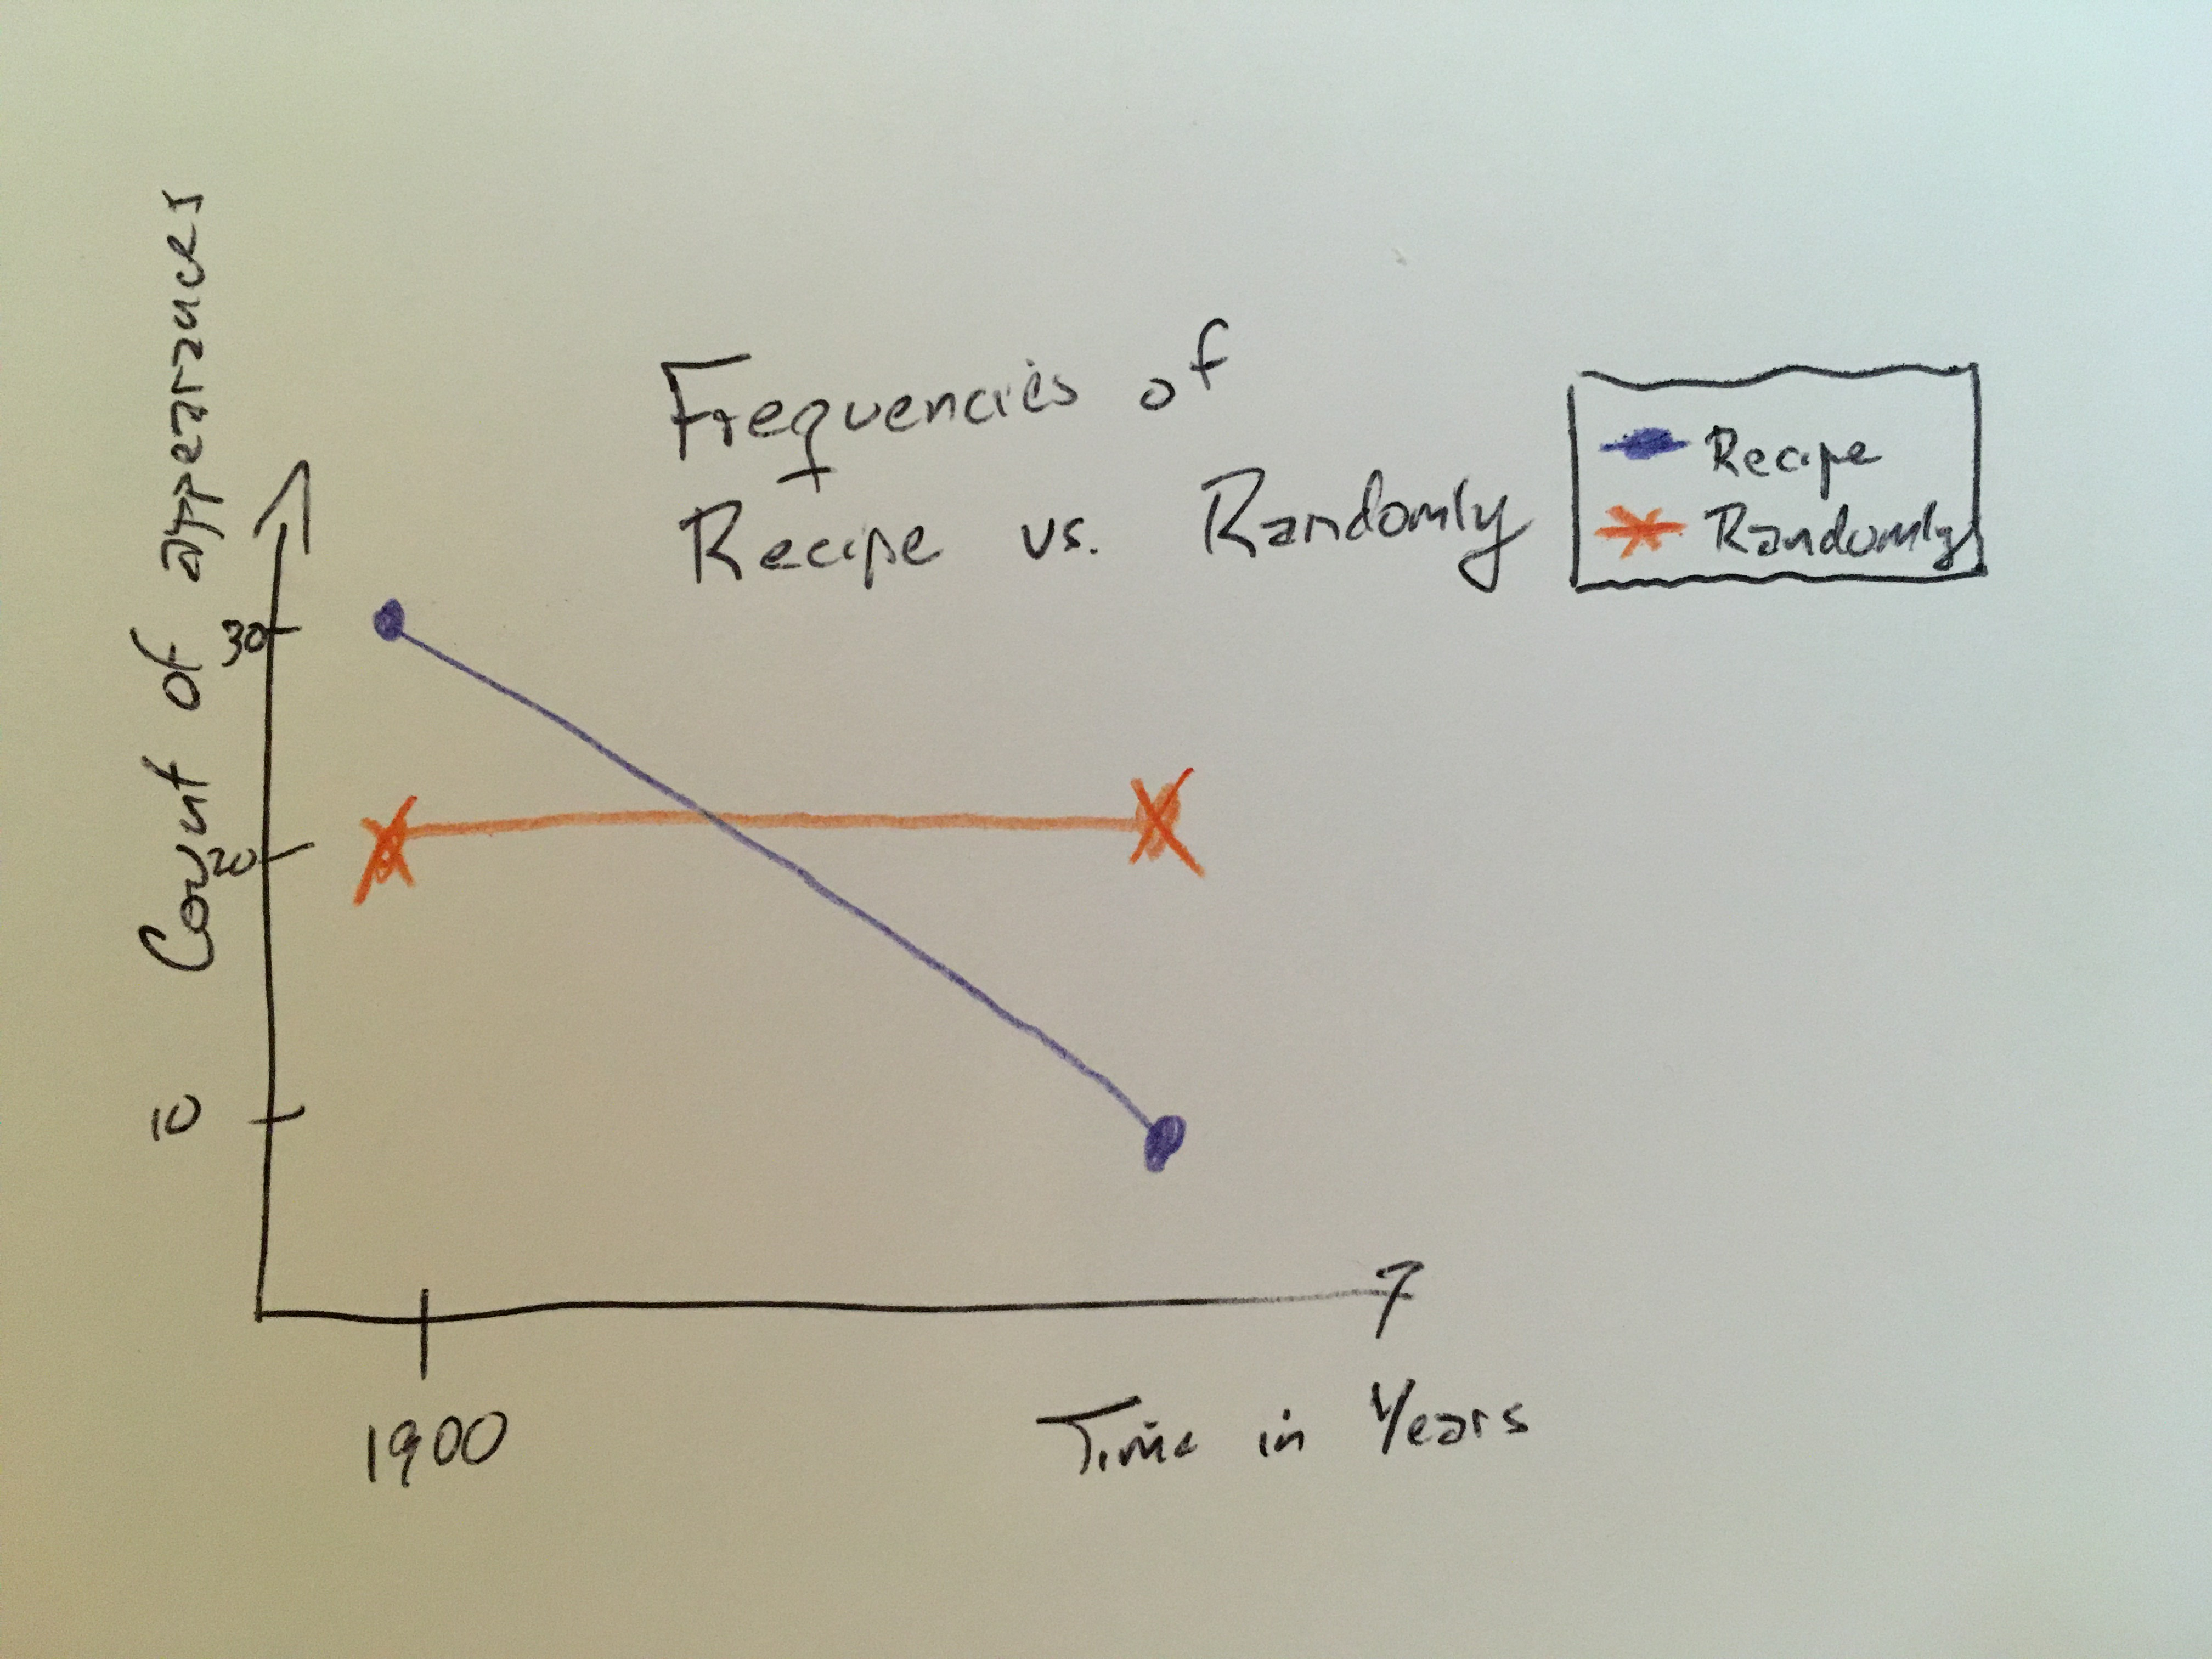

**TEST3**

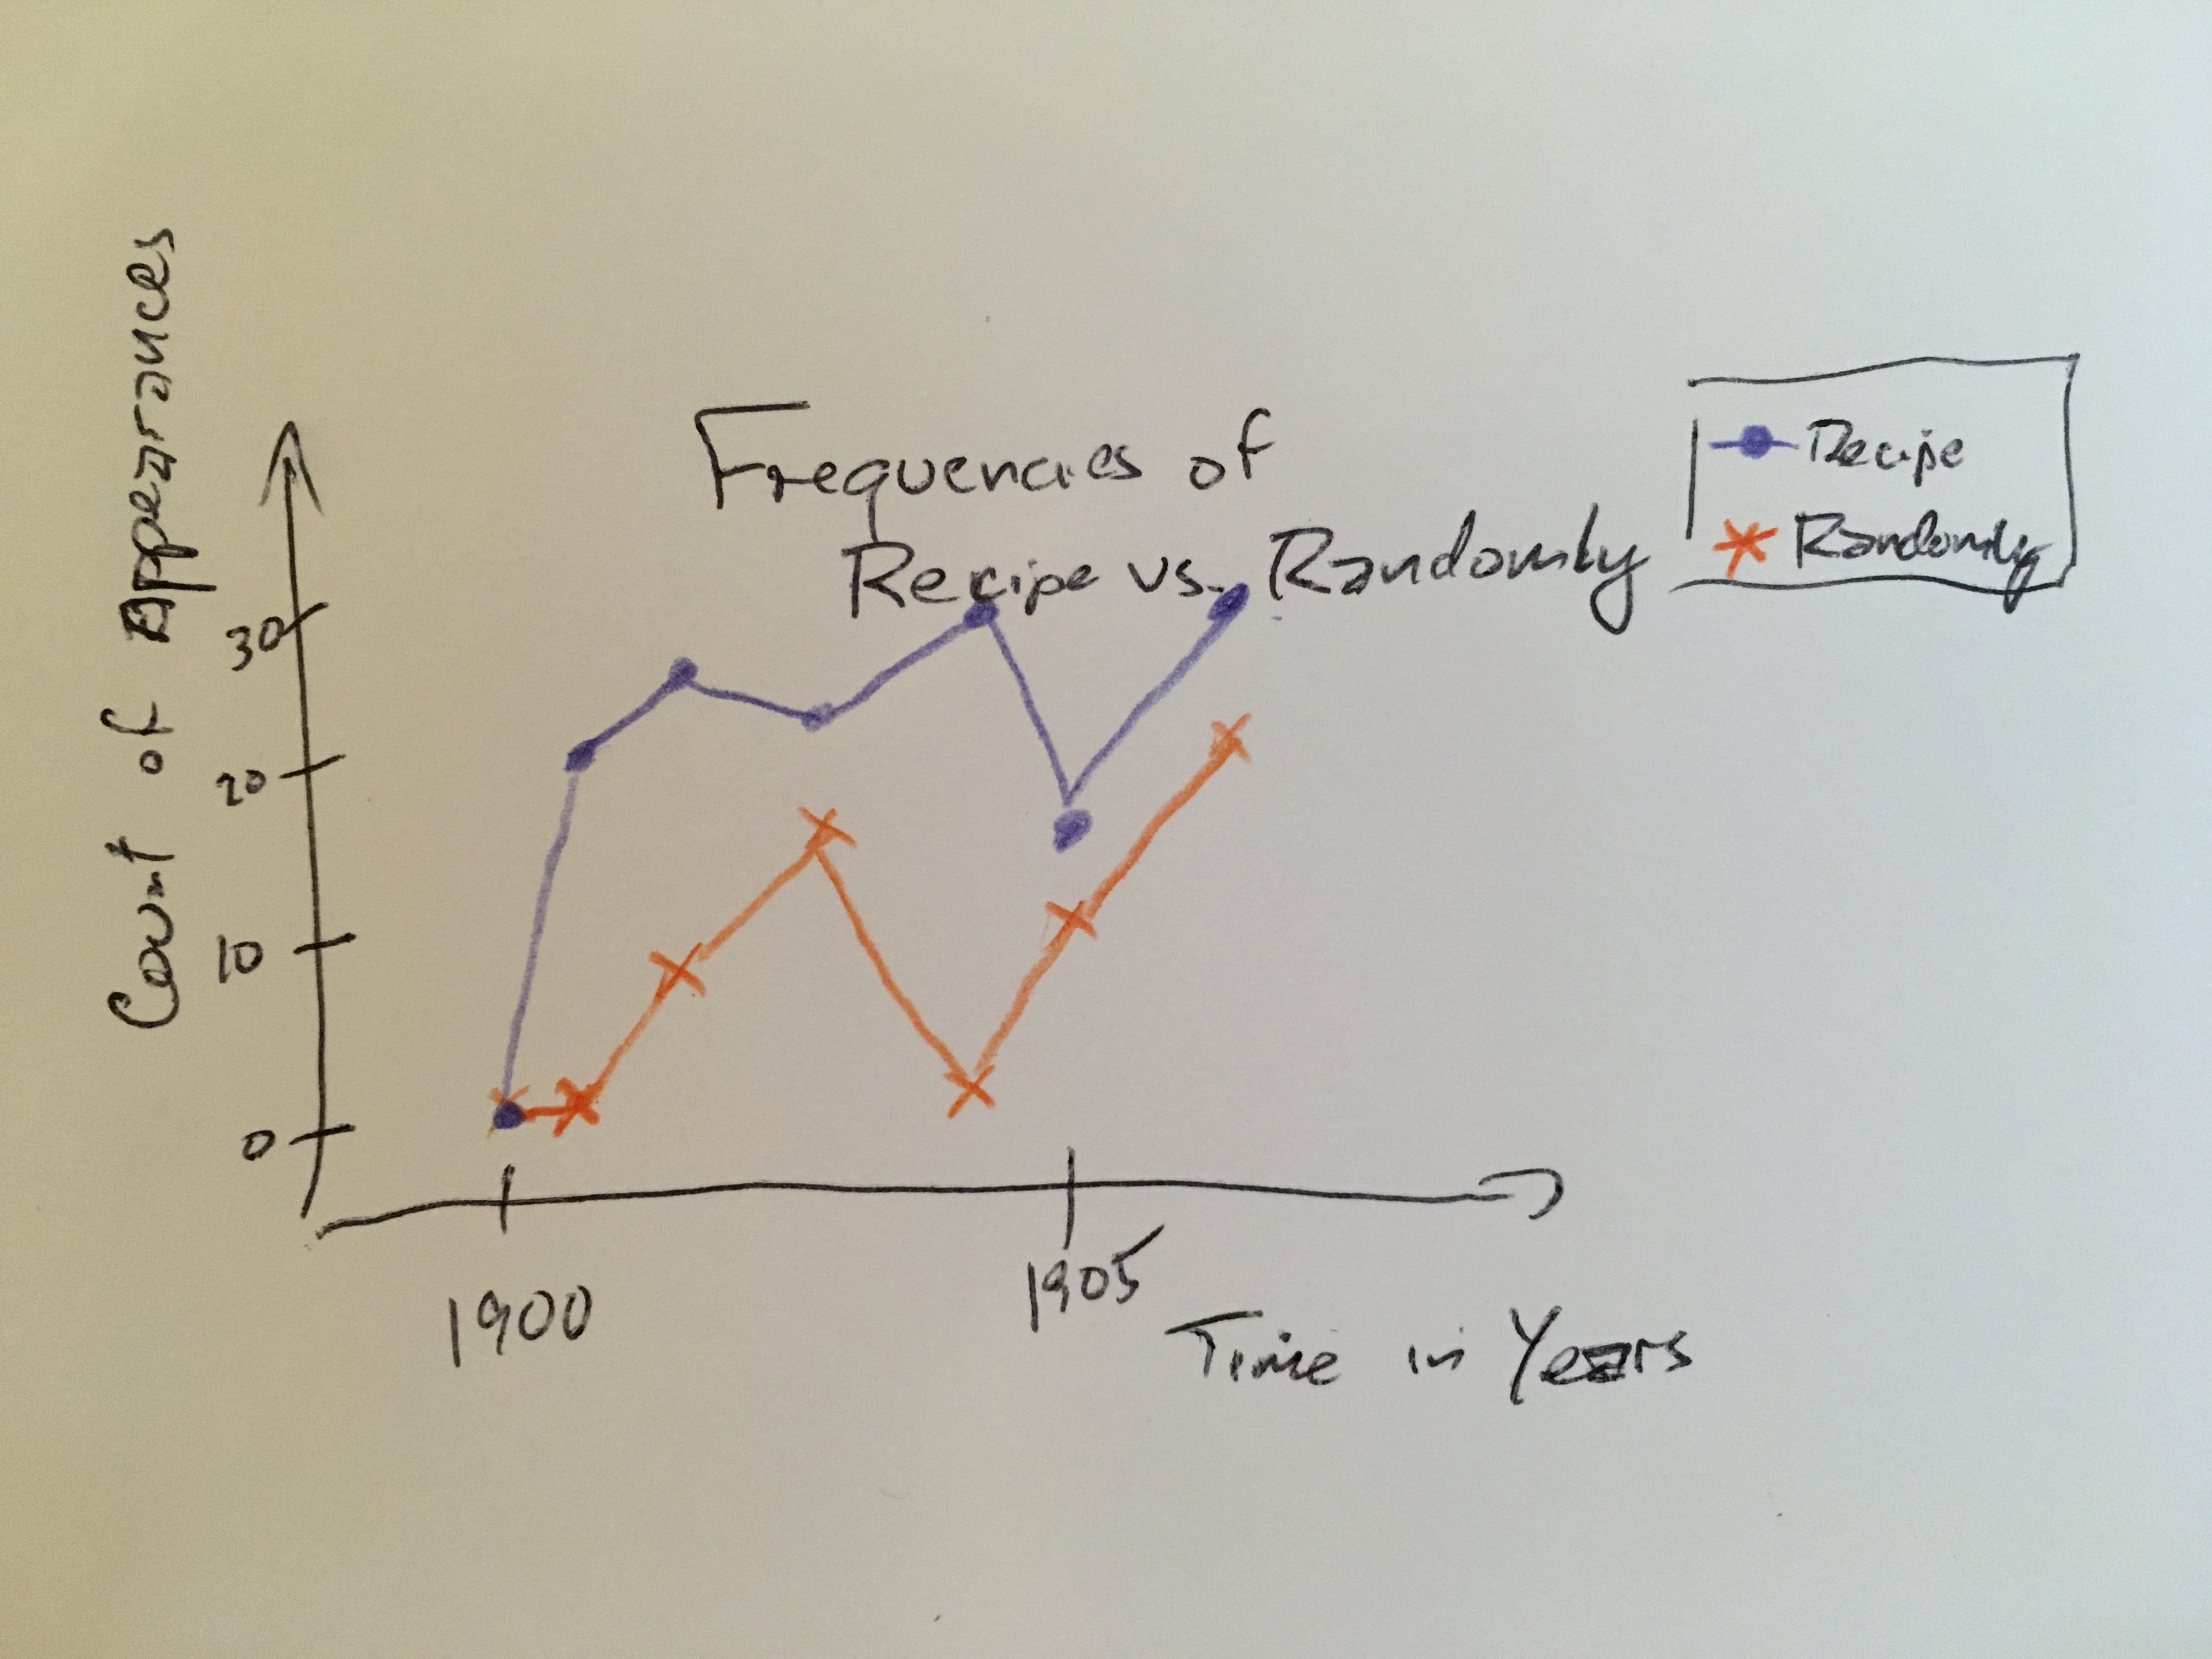

## Make the Actual Plot!

Now, call the function you designed on `FULL_LIST` in the cell below so you can see your final chart!

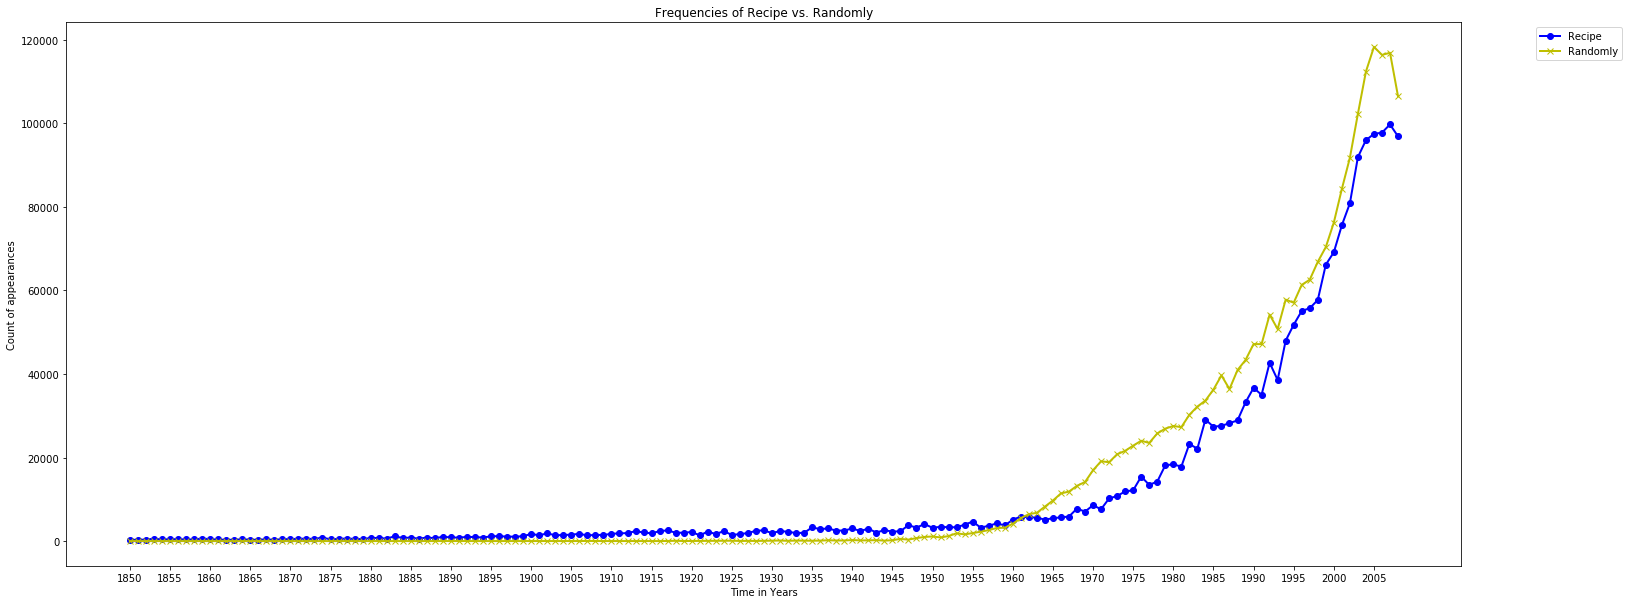

In [3]:
FULL_LIST = [
    WordFreq(1850, 349, 1),
    WordFreq(1851, 285, None),
    WordFreq(1852, 373, None),
    WordFreq(1853, 574, 4),
    WordFreq(1854, 388, None),
    WordFreq(1855, 463, 4),
    WordFreq(1856, 458, 1),
    WordFreq(1857, 396, 3),
    WordFreq(1858, 391, 1),
    WordFreq(1859, 611, 2),
    WordFreq(1860, 452, None),
    WordFreq(1861, 381, 5),
    WordFreq(1862, 312, None),
    WordFreq(1863, 312, 5),
    WordFreq(1864, 439, 2),
    WordFreq(1865, 334, None),
    WordFreq(1866, 324, 2),
    WordFreq(1867, 428, None),
    WordFreq(1868, 298, 3),
    WordFreq(1869, 484, None),
    WordFreq(1870, 463, None),
    WordFreq(1871, 555, None),
    WordFreq(1872, 559, 1),
    WordFreq(1873, 507, None),
    WordFreq(1874, 848, 2),
    WordFreq(1875, 404, 6),
    WordFreq(1876, 549, 9),
    WordFreq(1877, 589, 2),
    WordFreq(1878, 518, 5),
    WordFreq(1879, 470, 19),
    WordFreq(1880, 746, 6),
    WordFreq(1881, 717, 2),
    WordFreq(1882, 608, 6),
    WordFreq(1883, 1146, 6),
    WordFreq(1884, 724, 12),
    WordFreq(1885, 843, 2),
    WordFreq(1886, 556, 1),
    WordFreq(1887, 853, 9),
    WordFreq(1888, 675, 1),
    WordFreq(1889, 1018, 4),
    WordFreq(1890, 887, 13),
    WordFreq(1891, 813, 4),
    WordFreq(1892, 1009, 16),
    WordFreq(1893, 947, 8),
    WordFreq(1894, 857, 3),
    WordFreq(1895, 1146, 7),
    WordFreq(1896, 1183, 14),
    WordFreq(1897, 1069, 19),
    WordFreq(1898, 1059, 6),
    WordFreq(1899, 1160, 3),
    WordFreq(1900, 1719, 24),
    WordFreq(1901, 1375, 6),
    WordFreq(1902, 1860, 11),
    WordFreq(1903, 1391, 8),
    WordFreq(1904, 1454, 6),
    WordFreq(1905, 1528, 24),
    WordFreq(1906, 1748, 10),
    WordFreq(1907, 1346, 36),
    WordFreq(1908, 1496, 17),
    WordFreq(1909, 1442, 8),
    WordFreq(1910, 1763, 12),
    WordFreq(1911, 1829, 8),
    WordFreq(1912, 1930, 7),
    WordFreq(1913, 2361, 6),
    WordFreq(1914, 2068, 9),
    WordFreq(1915, 1844, 5),
    WordFreq(1916, 2398, 4),
    WordFreq(1917, 2557, 25),
    WordFreq(1918, 2007, 73),
    WordFreq(1919, 1993, 14),
    WordFreq(1920, 2178, 25),
    WordFreq(1921, 1376, 13),
    WordFreq(1922, 2276, 36),
    WordFreq(1923, 1675, 53),
    WordFreq(1924, 2398, 46),
    WordFreq(1925, 1456, 90),
    WordFreq(1926, 1689, 31),
    WordFreq(1927, 1914, 51),
    WordFreq(1928, 2477, 34),
    WordFreq(1929, 2563, 60),
    WordFreq(1930, 1909, 67),
    WordFreq(1931, 2402, 129),
    WordFreq(1932, 2234, 65),
    WordFreq(1933, 1919, 120),
    WordFreq(1934, 1980, 102),
    WordFreq(1935, 3273, 82),
    WordFreq(1936, 2866, 109),
    WordFreq(1937, 3025, 201),
    WordFreq(1938, 2514, 138),
    WordFreq(1939, 2516, 141),
    WordFreq(1940, 3026, 250),
    WordFreq(1941, 2423, 165),
    WordFreq(1942, 2962, 174),
    WordFreq(1943, 2052, 229),
    WordFreq(1944, 2623, 106),
    WordFreq(1945, 2264, 204),
    WordFreq(1946, 2359, 525),
    WordFreq(1947, 3796, 352),
    WordFreq(1948, 3231, 715),
    WordFreq(1949, 4071, 990),
    WordFreq(1950, 3191, 1106),
    WordFreq(1951, 3412, 872),
    WordFreq(1952, 3311, 1205),
    WordFreq(1953, 3312, 1868),
    WordFreq(1954, 3922, 1602),
    WordFreq(1955, 4662, 1919),
    WordFreq(1956, 3231, 2243),
    WordFreq(1957, 3656, 2633),
    WordFreq(1958, 4239, 3119),
    WordFreq(1959, 3754, 3202),
    WordFreq(1960, 5094, 4151),
    WordFreq(1961, 5880, 5490),
    WordFreq(1962, 5686, 6446),
    WordFreq(1963, 5634, 6764),
    WordFreq(1964, 5130, 8251),
    WordFreq(1965, 5479, 9700),
    WordFreq(1966, 5663, 11409),
    WordFreq(1967, 5869, 11840),
    WordFreq(1968, 7779, 13229),
    WordFreq(1969, 7060, 14130),
    WordFreq(1970, 8574, 16957),
    WordFreq(1971, 7623, 19102),
    WordFreq(1972, 10201, 18868),
    WordFreq(1973, 10777, 20776),
    WordFreq(1974, 11889, 21603),
    WordFreq(1975, 12150, 22842),
    WordFreq(1976, 15435, 24005),
    WordFreq(1977, 13458, 23491),
    WordFreq(1978, 14232, 25750),
    WordFreq(1979, 18126, 26908),
    WordFreq(1980, 18368, 27543),
    WordFreq(1981, 17816, 27259),
    WordFreq(1982, 23236, 30220),
    WordFreq(1983, 22119, 32188),
    WordFreq(1984, 29082, 33627),
    WordFreq(1985, 27367, 36246),
    WordFreq(1986, 27573, 39646),
    WordFreq(1987, 28215, 36364),
    WordFreq(1988, 28877, 40924),
    WordFreq(1989, 33199, 43331),
    WordFreq(1990, 36659, 47138),
    WordFreq(1991, 35006, 47132),
    WordFreq(1992, 42681, 54191),
    WordFreq(1993, 38555, 50726),
    WordFreq(1994, 47963, 57772),
    WordFreq(1995, 51764, 57043),
    WordFreq(1996, 55064, 61310),
    WordFreq(1997, 55727, 62545),
    WordFreq(1998, 57692, 66812),
    WordFreq(1999, 66137, 70343),
    WordFreq(2000, 69115, 76222),
    WordFreq(2001, 75578, 84259),
    WordFreq(2002, 80817, 91713),
    WordFreq(2003, 91884, 102250),
    WordFreq(2004, 95934, 112347),
    WordFreq(2005, 97426, 118246),
    WordFreq(2006, 97738, 116334),
    WordFreq(2007, 99693, 116838),
    WordFreq(2008, 96825, 106398)
]

# Makes the resulting graph a bit wider so it's more readable:
pyplot.figure(figsize=(25,10))

# Call your function on FULL_LIST here:
show_word_freq_chart(FULL_LIST)